In [7]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32')/ 255.
x_test = x_test.astype('float32')/ 255.
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

---
### 2種reshape方式
原始的shape

In [5]:
x_train.shape

(60000, 28, 28)

In [2]:
np.reshape(x_train, (60000, 784))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [3]:
x_train.reshape(60000, 784)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
x_train.reshape(60000, 784).shape

(60000, 784)

---
### model

In [9]:
from keras.models import Model, Input
from keras.layers.core import Dense

input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

dencoded = Dense(64, activation='relu')(encoded)
dencoded = Dense(128, activation='relu')(dencoded)
dencoded = Dense(784, activation='relu')(dencoded)
autoencoder= Model(input_img, dencoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_split=0.1, verbose=2)

W0707 20:42:00.430141  9784 deprecation_wrapper.py:119] From c:\users\wade\.virtualenvs\19'_summer_vacation-ib8vnh7u\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0707 20:42:00.441141  9784 deprecation_wrapper.py:119] From c:\users\wade\.virtualenvs\19'_summer_vacation-ib8vnh7u\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0707 20:42:00.443114  9784 deprecation.py:323] From c:\users\wade\.virtualenvs\19'_summer_vacation-ib8vnh7u\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0707 20:42:00.541140  9784 deprecation_wrapper.py:119] From c:\users\wade\.virtualenvs\19'_summer_vacation-ib8vnh7

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
 - 2s - loss: 0.4648 - val_loss: 0.3593
Epoch 2/20
 - 1s - loss: 0.3410 - val_loss: 0.3168
Epoch 3/20
 - 1s - loss: 0.3254 - val_loss: 0.3058
Epoch 4/20
 - 1s - loss: 0.3093 - val_loss: 0.3257
Epoch 5/20
 - 1s - loss: 0.2835 - val_loss: 0.2722
Epoch 6/20
 - 1s - loss: 0.2658 - val_loss: 0.2583
Epoch 7/20
 - 1s - loss: 0.2918 - val_loss: 0.2818
Epoch 8/20
 - 1s - loss: 0.2933 - val_loss: 0.2680
Epoch 9/20
 - 1s - loss: 0.2605 - val_loss: 0.2505
Epoch 10/20
 - 1s - loss: 0.2524 - val_loss: 0.2431
Epoch 11/20
 - 1s - loss: 0.2446 - val_loss: 0.2447
Epoch 12/20
 - 1s - loss: 0.2668 - val_loss: 0.2615
Epoch 13/20
 - 1s - loss: 0.2496 - val_loss: 0.2432
Epoch 14/20
 - 1s - loss: 0.2391 - val_loss: 0.2408
Epoch 15/20
 - 1s - loss: 0.2402 - val_loss: 0.2749
Epoch 16/20
 - 1s - loss: 0.2404 - val_loss: 0.2263
Epoch 17/20
 - 1s - loss: 0.2282 - val_loss: 0.2228
Epoch 18/20
 - 1s - loss: 0.2231 - val_loss: 0.2185
Epoch 19/20
 - 1s - loss

> https://github.com/lbun/VAE_Variational_Autoencoders/blob/master/VAE_Variational_Autoencoders_Part1.ipynb

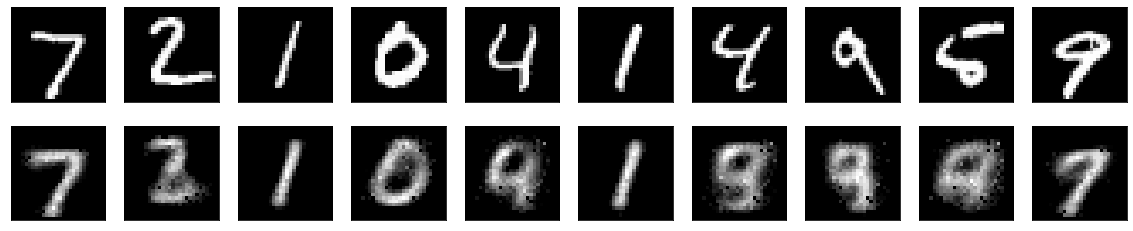

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

decoded_img = autoencoder.predict(x_test)

n=10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

### model - CNN
> https://ithelp.ithome.com.tw/articles/10207148

In [13]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32')/ 255.
x_test = x_test.astype('float32')/ 255.
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

In [14]:
# add noise
noise_factor = 0.5
# numpy.random.normal 函數裡的三個參數分别代表生成的高斯分布的均值、標準差以及輸出的 size
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# 把 array 限制在一定範圍内
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [16]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same', name='encoder')(x) 

# at this point the representation is (4, 4, 8) i.e. 128-dimensional: 4*4*8=128

# Decoder 的過程與 Encoder 正好相反，需要跟 Encoder 的神經網絡層做相對應，相對應的激活函數也是一樣，但這邊在解碼中最後一層使用的激活函數是 sigmoid
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# 用 Model 來搭建模型，輸入為圖片，輸出是解碼的結果
autoencoder = Model(input_img, decoded)  

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 訓練 Denoising AE ，輸入是加入雜訊的圖片，輸出是原始圖片
autoencoder.fit(x_train_noisy, x_train, epochs=20,batch_size=128,shuffle=True,validation_data=(x_test_noisy, x_test),verbose=2)

W0707 21:03:30.072317  9784 deprecation_wrapper.py:119] From c:\users\wade\.virtualenvs\19'_summer_vacation-ib8vnh7u\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0707 21:03:30.098870  9784 deprecation_wrapper.py:119] From c:\users\wade\.virtualenvs\19'_summer_vacation-ib8vnh7u\lib\site-packages\keras\backend\tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 4s - loss: 0.2660 - val_loss: 0.1972
Epoch 2/20
 - 2s - loss: 0.1821 - val_loss: 0.1712
Epoch 3/20
 - 2s - loss: 0.1678 - val_loss: 0.1620
Epoch 4/20
 - 2s - loss: 0.1595 - val_loss: 0.1549
Epoch 5/20
 - 2s - loss: 0.1539 - val_loss: 0.1506
Epoch 6/20
 - 2s - loss: 0.1504 - val_loss: 0.1472
Epoch 7/20
 - 2s - loss: 0.1476 - val_loss: 0.1451
Epoch 8/20
 - 2s - loss: 0.1450 - val_loss: 0.1435
Epoch 9/20
 - 2s - loss: 0.1430 - val_loss: 0.1411
Epoch 10/20
 - 2s - loss: 0.1413 - val_loss: 0.1394
Epoch 11/20
 - 2s - loss: 0.1398 - val_loss: 0.1375
Epoch 12/20
 - 2s - loss: 0.1386 - val_loss: 0.1367
Epoch 13/20
 - 2s - loss: 0.1377 - val_loss: 0.1364
Epoch 14/20
 - 2s - loss: 0.1369 - val_loss: 0.1351
Epoch 15/20
 - 2s - loss: 0.1362 - val_loss: 0.1347
Epoch 16/20
 - 2s - loss: 0.1354 - val_loss: 0.1335
Epoch 17/20
 - 2s - loss: 0.1349 - val_loss: 0.1331
Epoch 18/20
 - 2s - loss: 0.1342 - val_loss: 0.1326
Epoch 19/20
 - 2s - los

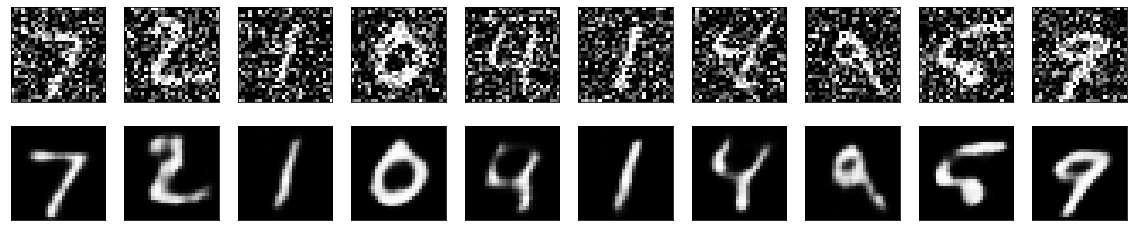

In [24]:
decoded_img_noisy = autoencoder.predict(x_test)

plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, n+i+1)
    plt.imshow(decoded_img_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)